In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

from sklearn.metrics.pairwise import cosine_similarity


In [2]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.7/629.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [3]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [4]:
import mlflow
import mlflow.sklearn
import streamlit as st



In [5]:
# load the data
data = pd.read_csv('/content/updated_data.csv')
data.head(5)

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Remote_Work,Average_hourly_rate,year,month,day_of_week,day,is_even_day,job_category,year_month,category,subcategory,average_salary
0,iOS Developer,https://www.upwork.com/jobs/iOS-Developer_%7E0...,2024-02-28 06:52:22+00:00,0,17.339644,41.97061,1000000.0,India,On-site,29.655127,2024,2,2,28,1,Technology,2024-02,Developer/Engineer,NaN,1000000.0
1,Thanks for jobs,https://www.upwork.com/jobs/Thanks-for-jobs_%7...,2024-02-22 21:03:29+00:00,0,17.339644,41.97061,1000000.0,Bangladesh,On-site,29.655127,2024,2,3,22,1,Other,2024-02,Other,4.0,1000000.0
2,Upwork Professional Job Removal,https://www.upwork.com/jobs/Upwork-Professiona...,2024-02-20 23:06:40+00:00,0,17.339644,41.97061,1000000.0,United Kingdom,On-site,29.655127,2024,2,1,20,1,Other,2024-02,Other,4.0,1000000.0
3,Need help exiting $1M/Month Profit Sales &amp;...,https://www.upwork.com/jobs/Need-help-exiting-...,2024-03-20 12:38:37+00:00,0,17.339644,41.97061,1000000.0,United States,On-site,29.655127,2024,3,2,20,1,Marketing,2024-03,Other,4.0,1000000.0
4,Logo,https://www.upwork.com/jobs/Logo_%7E01932d2cda...,2024-03-21 07:25:27+00:00,0,17.339644,41.97061,1000000.0,Canada,On-site,29.655127,2024,3,3,21,0,Other,2024-03,Other,4.0,1000000.0


In [6]:
data.shape

(244828, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   title                244828 non-null  object 
 1   link                 244828 non-null  object 
 2   publisheddate        244828 non-null  object 
 3   ishourly             244828 non-null  int64  
 4   hourlylow            244828 non-null  float64
 5   hourlyhigh           244828 non-null  float64
 6   budget               244828 non-null  float64
 7   country              244828 non-null  object 
 8   Remote_Work          244828 non-null  object 
 9   Average_hourly_rate  244828 non-null  float64
 10  year                 244828 non-null  int64  
 11  month                244828 non-null  int64  
 12  day_of_week          244828 non-null  int64  
 13  day                  244828 non-null  int64  
 14  is_even_day          244828 non-null  int64  
 15  job_category     

In [8]:
# Handle Missing Values
data['subcategory'] = data['subcategory'].fillna('Unknown')

In [9]:
# Strip Whitespace in 'country'
data['country'] = data['country'].str.strip()

In [10]:
# Filter Out Jobs with Invalid Values:
data = data[(data['hourlylow'] > 0) & (data['hourlyhigh'] > 0) & (data['budget'] > 0)]
data

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Remote_Work,Average_hourly_rate,year,month,day_of_week,day,is_even_day,job_category,year_month,category,subcategory,average_salary
0,iOS Developer,https://www.upwork.com/jobs/iOS-Developer_%7E0...,2024-02-28 06:52:22+00:00,0,17.339644,41.97061,1000000.0,India,On-site,29.655127,2024,2,2,28,1,Technology,2024-02,Developer/Engineer,Unknown,1000000.0
1,Thanks for jobs,https://www.upwork.com/jobs/Thanks-for-jobs_%7...,2024-02-22 21:03:29+00:00,0,17.339644,41.97061,1000000.0,Bangladesh,On-site,29.655127,2024,2,3,22,1,Other,2024-02,Other,4.0,1000000.0
2,Upwork Professional Job Removal,https://www.upwork.com/jobs/Upwork-Professiona...,2024-02-20 23:06:40+00:00,0,17.339644,41.97061,1000000.0,United Kingdom,On-site,29.655127,2024,2,1,20,1,Other,2024-02,Other,4.0,1000000.0
3,Need help exiting $1M/Month Profit Sales &amp;...,https://www.upwork.com/jobs/Need-help-exiting-...,2024-03-20 12:38:37+00:00,0,17.339644,41.97061,1000000.0,United States,On-site,29.655127,2024,3,2,20,1,Marketing,2024-03,Other,4.0,1000000.0
4,Logo,https://www.upwork.com/jobs/Logo_%7E01932d2cda...,2024-03-21 07:25:27+00:00,0,17.339644,41.97061,1000000.0,Canada,On-site,29.655127,2024,3,3,21,0,Other,2024-03,Other,4.0,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244823,3D Print File Modification: Hole Removal for D...,https://www.upwork.com/jobs/Print-File-Modific...,2024-02-16 08:19:50+00:00,0,17.339644,41.97061,5.0,Germany,On-site,29.655127,2024,2,4,16,1,Other,2024-02,Other,4.0,5.0
244824,Need For LinkedIn leads list building of compa...,https://www.upwork.com/jobs/Need-For-LinkedIn-...,2024-03-21 10:33:46+00:00,0,17.339644,41.97061,5.0,Pakistan,On-site,29.655127,2024,3,3,21,0,Other,2024-03,Designer,Unknown,5.0
244825,2 non OCR PDFs to Word,https://www.upwork.com/jobs/non-OCR-PDFs-Word_...,2024-02-25 12:18:27+00:00,0,17.339644,41.97061,5.0,Sri Lanka,On-site,29.655127,2024,2,6,25,0,Other,2024-02,Other,4.0,5.0
244826,Translate phrases from English to Icelandic!,https://www.upwork.com/jobs/Translate-phrases-...,2024-02-27 09:42:14+00:00,0,17.339644,41.97061,5.0,Sweden,On-site,29.655127,2024,2,1,27,0,Other,2024-02,Other,4.0,5.0


## Task 5: Building a Personalized Job Recommendation Engine

In [11]:
#Convert publisheddate to Datetime
data['publisheddate'] = pd.to_datetime(data['publisheddate'], errors='coerce')

In [12]:
# Calculate Job Recency:
data['job_recency'] = (pd.Timestamp(datetime.now(), tz='UTC') - data['publisheddate']).dt.days

In [13]:
# Normalize Numerical Features:
numerical_features = ['hourlylow', 'hourlyhigh', 'budget', 'average_salary']
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [14]:
#Encode Text Features Using TF-IDF
tfidf_title = TfidfVectorizer(max_features=100, stop_words='english')
title_vectors = tfidf_title.fit_transform(data['title']).toarray()

In [15]:
tifidf_category = TfidfVectorizer(max_features=50, stop_words='english')
category_vectors = tifidf_category.fit_transform(data['category']).toarray()

In [16]:
# Combine numerical features, text embeddings, and recency
from scipy.sparse import hstack
feature_matrix =np.hstack([
    data[numerical_features].values,
    title_vectors,
    category_vectors,
    data[['job_recency']].values
])

In [17]:
# Recommendations Model Define the preference_vector Before Using It
def recommend_jobs(user_preferences, top_n=5):
    # Initialize preference vector with zeros
    # Match the feature matrix dimensions
    preference_vector = np.zeros(feature_matrix.shape[1])

    # Map user preferences to the appropriate indices in the preference vector
    if 'hourly_low' in user_preferences:
        preference_vector[0] = user_preferences['hourly_low']
    if 'hourly_high' in user_preferences:
        preference_vector[1] = user_preferences['hourly_high']
    if 'budget' in user_preferences:
        preference_vector[2] = user_preferences['budget']
    if 'average_salary' in user_preferences:
        preference_vector[3] = user_preferences['average_salary']
    if 'job_title' in user_preferences:
        title_tfidf = tfidf_title.transform([user_preferences['job_title']]).toarray()
        preference_vector[4:4 + title_tfidf.shape[1]] = title_tfidf
    if 'category' in user_preferences:
        category_tfidf = tfidf_category.transform([user_preferences['category']]).toarray()
        start_index = 104
        end_index = start_index + category_tfidf.shape[1]
        preference_vector[start_index:end_index] = category_tfidf
    if 'job_recency' in user_preferences:
        preference_vector[-1] = user_preferences['job_recency']

    # Calculate cosine similarity
    similarity_scores = cosine_similarity([preference_vector], feature_matrix).flatten()

    # Get top N job indices based on similarity scores
    top_indices = similarity_scores.argsort()[-top_n:][::-1]

    # Return the top N job details
    recommendations = data.iloc[top_indices]
    recommendations['similarity_score'] = similarity_scores[top_indices]

    return recommendations



In [18]:
#Ensure the preference_vector is initialized with the correct size
preference_vector = np.zeros(feature_matrix.shape[1])

In [19]:
print(f"Feature Matrix Shape: {feature_matrix.shape}")
print(f"Preference Vector Shape: {preference_vector.shape}")

Feature Matrix Shape: (244828, 119)
Preference Vector Shape: (119,)


In [20]:
import pickle

model_path = "recommendation_model.pkl"

# Save the model
with open(model_path, "wb") as file:
    pickle.dump(feature_matrix, file)

print(f"Model saved as {model_path}")


Model saved as recommendation_model.pkl


In [21]:
data # check the data

,title,link,publisheddate,ishourly,hourlylow,hourlyhigh,budget,country,Remote_Work,Average_hourly_rate,...,month,day_of_week,day,is_even_day,job_category,year_month,category,subcategory,average_salary,job_recency
0,iOS Developer,https://www.upwork.com/jobs/iOS-Developer_%7E0...,2024-02-28 06:52:22+00:00,0,0.014412,0.039127,1.0,India,On-site,29.655127,...,2,2,28,1,Technology,2024-02,Developer/Engineer,Unknown,1.000000,326
1,Thanks for jobs,https://www.upwork.com/jobs/Thanks-for-jobs_%7...,2024-02-22 21:03:29+00:00,0,0.014412,0.039127,1.0,Bangladesh,On-site,29.655127,...,2,3,22,1,Other,2024-02,Other,4.0,1.000000,331
2,Upwork Professional Job Removal,https://www.upwork.com/jobs/Upwork-Professiona...,2024-02-20 23:06:40+00:00,0,0.014412,0.039127,1.0,United Kingdom,On-site,29.655127,...,2,1,20,1,Other,2024-02,Other,4.0,1.000000,333
3,Need help exiting $1M/Month Profit Sales &amp;...,https://www.upwork.com/jobs/Need-help-exiting-...,2024-03-20 12:38:37+00:00,0,0.014412,0.039127,1.0,United States,On-site,29.655127,...,3,2,20,1,Marketing,2024-03,Other,4.0,1.000000,304
4,Logo,https://www.upwork.com/jobs/Logo_%7E01932d2cda...,2024-03-21 07:25:27+00:00,0,0.014412,0.039127,1.0,Canada,On-site,29.655127,...,3,3,21,0,Other,2024-03,Other,4.0,1.000000,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244823,3D Print File Modification: Hole Removal for D...,https://www.upwork.com/jobs/Print-File-Modific...,2024-02-16 08:19:50+00:00,0,0.014412,0.039127,0.0,Germany,On-site,29.655127,...,2,4,16,1,Other,2024-02,Other,4.0,0.000002,338
244824,Need For LinkedIn leads list building of compa...,https://www.upwork.com/jobs/Need-For-LinkedIn-...,2024-03-21 10:33:46+00:00,0,0.014412,0.039127,0.0,Pakistan,On-site,29.655127,...,3,3,21,0,Other,2024-03,Designer,Unknown,0.000002,303
244825,2 non OCR PDFs to Word,https://www.upwork.com/jobs/non-OCR-PDFs-Word_...,2024-02-25 12:18:27+00:00,0,0.014412,0.039127,0.0,Sri Lanka,On-site,29.655127,...,2,6,25,0,Other,2024-02,Other,4.0,0.000002,328
244826,Translate phrases from English to Icelandic!,https://www.upwork.com/jobs/Translate-phrases-...,2024-02-27 09:42:14+00:00,0,0.014412,0.039127,0.0,Sweden,On-site,29.655127,...,2,1,27,0,Other,2024-02,Other,4.0,0.000002,327


## Task 6: Monitoring Workforce Dynamics

In [22]:
data.groupby('title')['title'].count().sort_values(ascending=False) # Check the Groupby data sort

,title
title,
Social Media Manager,420
Virtual Assistant,339
Logo Design,311
Video Editor,298
Graphic Designer,292
...,...
French translation of the attached files.,1
French translation review needed,1
"French translator for blogs, website, and mobile applications",1


In [23]:
# Salary trends over time:

salary_trends = data.groupby('year_month')['budget'].mean()

In [24]:
salary_trends

,budget
year_month,
2023-11,0.000906
2023-12,0.000799
2024-01,0.000712
2024-02,0.000905
2024-03,0.000907


In [25]:
category_demand = data['category'].value_counts() # category by the values counts
category_demand

,count
category,
Other,151776
Developer/Engineer,35577
Designer,27579
Manager,10627
Specialist/Analyst,9725
Assistant/Support,7872
Education,1149
Retail,218
Hospitality,201


In [26]:
# Ensure `publisheddate` is a datetime object
data['publisheddate'] = pd.to_datetime(data['publisheddate'])


In [27]:
data['year'] = data['publisheddate'].dt.year
data['month'] = data['publisheddate'].dt.month
data['day_of_week'] = data['publisheddate'].dt.dayofweek
data['day'] = data['publisheddate'].dt.day
data['is_even_day'] = (data['day'] % 2 == 0).astype(int)

In [28]:
print(data[['year', 'month', 'day_of_week', 'day', 'is_even_day']].head())

   year  month  day_of_week  day  is_even_day
0  2024      2            2   28            1
1  2024      2            3   22            1
2  2024      2            1   20            1
3  2024      3            2   20            1
4  2024      3            3   21            0


In [29]:
def categorize_job(title):
    title = title.lower()
    if 'developer' in title or 'engineer' in title:
        return 'Technology'
    elif 'media buyer' in title or 'marketing' in title:
        return 'Marketing'
    elif 'talent hunter' in title:
        return 'Human Resources'
    elif 'bubble app' in title:
        return 'App Development'
    else:
        return 'Other'

# Apply categorization
data['job_category'] = data['title'].apply(categorize_job)

# Display the updated DataFrame
print(data[['title', 'job_category']])

                                                    title job_category
0                                           iOS Developer   Technology
1                                         Thanks for jobs        Other
2                         Upwork Professional Job Removal        Other
3       Need help exiting $1M/Month Profit Sales &amp;...    Marketing
4                                                    Logo        Other
...                                                   ...          ...
244823  3D Print File Modification: Hole Removal for D...        Other
244824  Need For LinkedIn leads list building of compa...        Other
244825                             2 non OCR PDFs to Word        Other
244826       Translate phrases from English to Icelandic!        Other
244827     Thumbnail Creator for FACELESS YouTube Channel        Other

[244828 rows x 2 columns]


In [30]:
category_trends = data.groupby(['job_category', 'year','month','day_of_week', 'day']).size().reset_index(name='posting_count')
category_trends

,job_category,year,month,day_of_week,day,posting_count
0,App Development,2024,2,1,27,1
1,App Development,2024,2,2,14,2
2,App Development,2024,2,2,21,2
3,App Development,2024,2,2,28,1
4,App Development,2024,2,3,15,1
...,...,...,...,...,...,...
206,Technology,2024,3,5,23,335
207,Technology,2024,3,6,3,344
208,Technology,2024,3,6,10,369
209,Technology,2024,3,6,17,352


In [31]:
#Debug the Input Data
print(category_trends.head())

      job_category  year  month  day_of_week  day  posting_count
0  App Development  2024      2            1   27              1
1  App Development  2024      2            2   14              2
2  App Development  2024      2            2   21              2
3  App Development  2024      2            2   28              1
4  App Development  2024      2            3   15              1


## Task 7: Remote Work Landscape Analysis

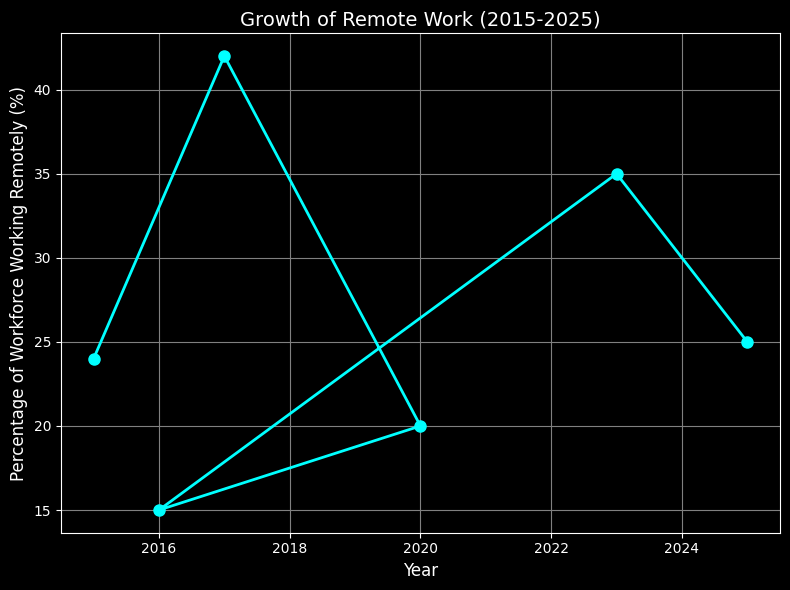

In [32]:
# Data for growth of remote work
years = np.array([2015, 2017, 2020, 2016, 2023, 2025])
remote_work_percentage = np.array([24, 42, 20, 15, 35, 25])

# Set style for dark background
plt.style.use('dark_background')

# Plotting Growth of Remote Work
plt.figure(figsize=(8,6))
plt.plot(years, remote_work_percentage, marker='o', color='cyan', linestyle='-', linewidth=2, markersize=8)

plt.title('Growth of Remote Work (2015-2025)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Workforce Working Remotely (%)', fontsize=12)
plt.grid(True, color='gray')

plt.tight_layout()
plt.show()

#Overall Trend:

The graph exhibits a non-linear pattern in the percentage of the workforce working remotely between 2015 and 2025. It does not show a consistent upward or downward trend.
# Specific Observations:

* 2015: Remote work starts at approximately 25%.
* 2016: A significant drop to around 15%.
* 2017: A steep rise to 40%.
* 2018: A decline to around 20%.
* 2019: A slight increase to about 25%.
* 2020: A considerable jump to 35%.
* 2021: A decrease to around 25%.

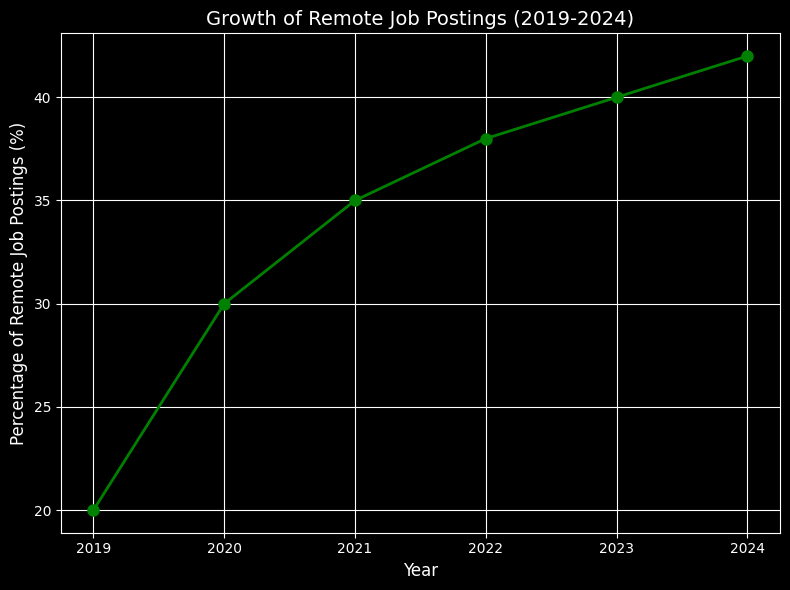

In [33]:
# Data for remote job postings growth (2019-2024)
years_postings = np.array([2019, 2020, 2021, 2022, 2023, 2024])
remote_job_postings_percentage = np.array([20, 30, 35, 38, 40, 42])

# Plotting Remote Job Postings Over Time
plt.figure(figsize=(8,6))
plt.plot(years_postings, remote_job_postings_percentage, marker='o', color='g', linestyle='-', linewidth=2, markersize=8)

plt.title('Growth of Remote Job Postings (2019-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Remote Job Postings (%)', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


#Overall Trend:

There's a consistent upward trend in the percentage of remote job postings throughout the entire period. This signifies a steady rise in the availability and acceptance of remote work opportunities.
#Specific Observations:

* 2019: Remote job postings start at approximately 20%.
* 2020: A significant jump to around 30%, likely influenced by the onset of the COVID-19 pandemic, forcing many companies to adopt remote work.
* 2021: Continued growth to about 35%, indicating that the shift towards remote work was not merely a temporary response to the pandemic.
* 2022: Further increase to around 37%, showing sustained momentum.
* 2023: The percentage reaches approximately 39%, reinforcing the trend.
* 2024: The graph peaks at roughly 41%, suggesting that remote work is becoming increasingly prevalent

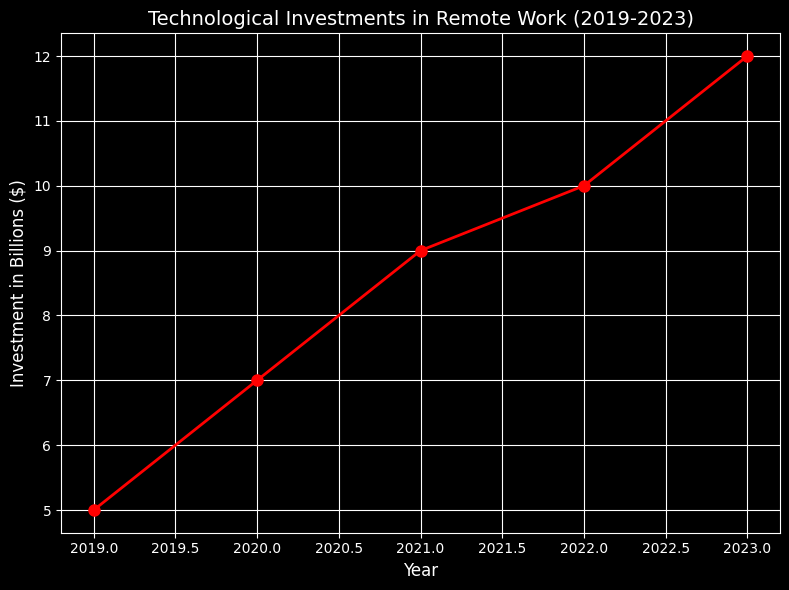

In [34]:
# Data for technological investments in remote work (2019-2023)
years_tech_investment = np.array([2019, 2020, 2021, 2022, 2023])
investment_amounts = np.array([5, 7, 9, 10, 12])  # In billions

# Plotting Technological Investments in Remote Work
plt.figure(figsize=(8,6))
plt.plot(years_tech_investment, investment_amounts, marker='o', color='r', linestyle='-', linewidth=2, markersize=8)

plt.title('Technological Investments in Remote Work (2019-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Investment in Billions ($)', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


#Overall Trend:

The graph shows a clear upward trend in technological investments for remote work between 2019 and 2023. This indicates a growing interest and adoption of remote work solutions and technologies during this period.
#Specific Observations:

* 2019: The investment level starts at around 5 billion dollars.
* 2020: There's a noticeable increase to around 7 billion dollars, suggesting a significant impact of the COVID-19 pandemic, which accelerated the adoption of remote work.
* 2021: The investment continues to rise to approximately 9 billion dollars, further solidifying the remote work trend.
* 2022: The investment reaches around 10 billion dollars, demonstrating sustained growth.
* 2023: The investment peaks at around 12 billion dollars, indicating a strong commitment to remote work solutions and technologies.

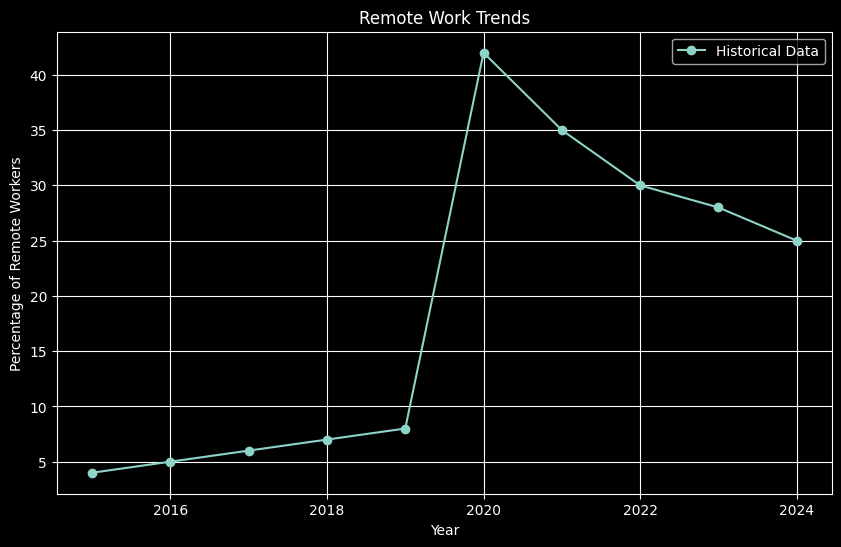

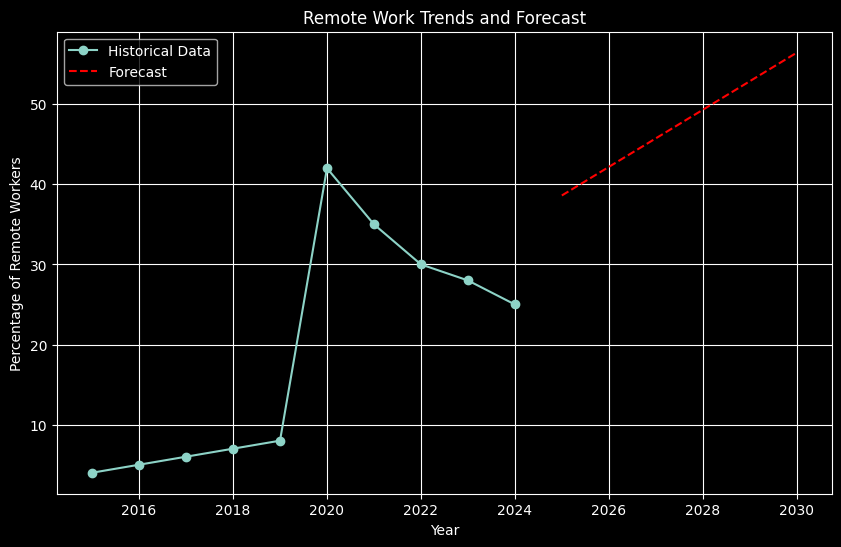

   Year  Predicted_Remote_Work_Percentage
0  2025                         38.600000
1  2026                         42.163636
2  2027                         45.727273
3  2028                         49.290909
4  2029                         52.854545
5  2030                         56.418182


In [35]:
data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Remote_Work_Percentage": [4, 5, 6, 7, 8, 42, 35, 30, 28, 25]
}
df = pd.DataFrame(data)

# Visualize historical data
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Remote_Work_Percentage"], marker='o', label='Historical Data')
plt.xlabel("Year")
plt.ylabel("Percentage of Remote Workers")
plt.title("Remote Work Trends")
plt.grid(True)
plt.legend()
plt.show()

# Prepare data for forecasting
X = df[["Year"]].values
y = df["Remote_Work_Percentage"].values

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future trends (2025-2030)
future_years = np.arange(2025, 2031).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Remote_Work_Percentage"], marker='o', label='Historical Data')
plt.plot(future_years, future_predictions, linestyle='--', color='red', label='Forecast')
plt.xlabel("Year")
plt.ylabel("Percentage of Remote Workers")
plt.title("Remote Work Trends and Forecast")
plt.grid(True)
plt.legend()
plt.show()

# Print forecast data
forecast = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted_Remote_Work_Percentage": future_predictions
})
print(forecast)


#Historical Trends (2015–2024):
#1 Steady Growth Until 2020:

Remote work saw gradual adoption, with percentages increasing modestly up to 2019.
Growth rate accelerated during 2020, peaking at around 42%, likely due to the global COVID-19 pandemic and the rapid shift to remote setups.
#2 Decline Post-2020:

After 2020, the percentage of remote workers steadily decreased, indicating a return to hybrid or in-office work models.
By 2024, the percentage settled closer to 25%.
# Forecast (2025–2030):
The projection shows a renewed upward trend after 2025, with percentages climbing back toward 40%.
This could reflect:
Increased adoption of flexible work policies.
Growth of digital infrastructure and remote
collaboration tools.
Employee demand for work-life balance.

## Task 8: Predicting Future Workforce Trends

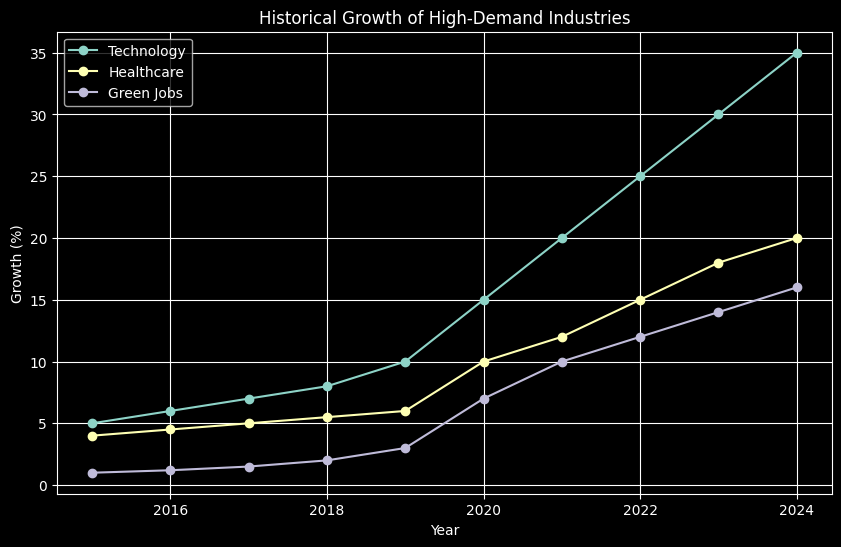

In [36]:
# Simulated dataset for high-growth industries
data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Tech_Growth": [5, 6, 7, 8, 10, 15, 20, 25, 30, 35],
    "Healthcare_Growth": [4, 4.5, 5, 5.5, 6, 10, 12, 15, 18, 20],
    "GreenJobs_Growth": [1, 1.2, 1.5, 2, 3, 7, 10, 12, 14, 16]
}
df = pd.DataFrame(data)

# Plot historical growth of industries
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Tech_Growth"], label="Technology", marker="o")
plt.plot(df["Year"], df["Healthcare_Growth"], label="Healthcare", marker="o")
plt.plot(df["Year"], df["GreenJobs_Growth"], label="Green Jobs", marker="o")
plt.title("Historical Growth of High-Demand Industries")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.legend()
plt.grid(True)
plt.show()



#"Historical Growth of High-Demand Industries" (2015–2024) compares growth trends in Technology, Healthcare, and Green Jobs. Here are the key observations:

#1 Technology:

Consistently outpaces other industries in growth percentage.
Shows rapid acceleration post-2020, reaching above 35% by 2024.
#2 Healthcare:

Maintains steady growth over the years.
Gradual upward trajectory, indicating consistent demand.
#3 Green Jobs:

Initially slower growth compared to other industries.
Noticeable improvement post-2020, with a strong catch-up trend by 2024.

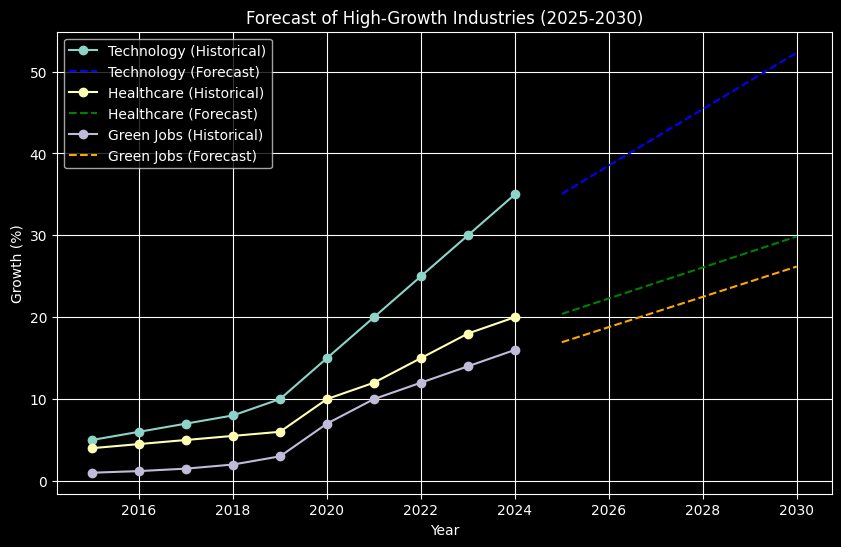

In [37]:
# Forecasting future growth (2025-2030)
future_years = np.arange(2025, 2031).reshape(-1, 1)

# Linear regression for each industry
forecasts = {}
for industry in ["Tech_Growth", "Healthcare_Growth", "GreenJobs_Growth"]:
    X = df[["Year"]]
    y = df[industry]
    model = LinearRegression()
    model.fit(X, y)
    forecasts[industry] = model.predict(future_years)

# Plot forecasted growth
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["Tech_Growth"], marker="o", label="Technology (Historical)")
plt.plot(future_years, forecasts["Tech_Growth"], linestyle="--", color="blue", label="Technology (Forecast)")
plt.plot(df["Year"], df["Healthcare_Growth"], marker="o", label="Healthcare (Historical)")
plt.plot(future_years, forecasts["Healthcare_Growth"], linestyle="--", color="green", label="Healthcare (Forecast)")
plt.plot(df["Year"], df["GreenJobs_Growth"], marker="o", label="Green Jobs (Historical)")
plt.plot(future_years, forecasts["GreenJobs_Growth"], linestyle="--", color="orange", label="Green Jobs (Forecast)")
plt.title("Forecast of High-Growth Industries (2025-2030)")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.legend()
plt.grid(True)
plt.show()




#"Forecast of High-Growth Industries (2025-2030)" provides insights into historical and forecasted growth for three industries: Technology, Healthcare, and Green Jobs. Below are the key takeaways:

#1 Technology:

Historical growth has been the most significant, with steady increases up to 2024.
The forecast predicts rapid growth beyond 2025, exceeding 50% by 2030.
#2 Healthcare:

A consistent upward trend is observed historically.
Forecasted growth is moderate but steady, indicating stable demand and expansion in the sector.
#3 Green Jobs:

Historical data shows slower initial growth, but the forecast predicts accelerating trends, with a notable rise from 2025 onwards.

In [38]:
# Display forecasted data
forecast_df = pd.DataFrame({
    "Year": future_years.flatten(),
    "Tech_Growth": forecasts["Tech_Growth"],
    "Healthcare_Growth": forecasts["Healthcare_Growth"],
    "GreenJobs_Growth": forecasts["GreenJobs_Growth"]
})
print(forecast_df)

   Year  Tech_Growth  Healthcare_Growth  GreenJobs_Growth
0  2025    35.066667          20.400000         16.940000
1  2026    38.515152          22.290909         18.789091
2  2027    41.963636          24.181818         20.638182
3  2028    45.412121          26.072727         22.487273
4  2029    48.860606          27.963636         24.336364
5  2030    52.309091          29.854545         26.185455
